In [40]:
import numpy as np
import matplotlib.pyplot as plt

### DQN

In [41]:
reward_train = np.genfromtxt('logs/csv/run-20201017-090041_train-tag-reward.csv', delimiter=',')
reward_test = np.genfromtxt('logs/csv/run-20201020-081305_test-tag-reward.csv', delimiter=',')

In [42]:
reward_test = reward_test[1:, :]

In [18]:
# Get Smoothed Training Reward
average = []
step_average = []

interval = 200
limit = 100
step = limit/2

# The 837th row corresponds to the 20000th episode
reward_headless = reward_train[1:838, :]
average_tmp = 0
counter = 0

for i in range(reward_headless.shape[0]):
    if reward_headless[i, 1] < limit:
        average_tmp += reward_headless[i, 2]
        counter += 1
    else:
        average.append(average_tmp/counter)
        limit += interval
        counter = 0
        average_tmp = 0
        step_average.append(step)
        step += interval

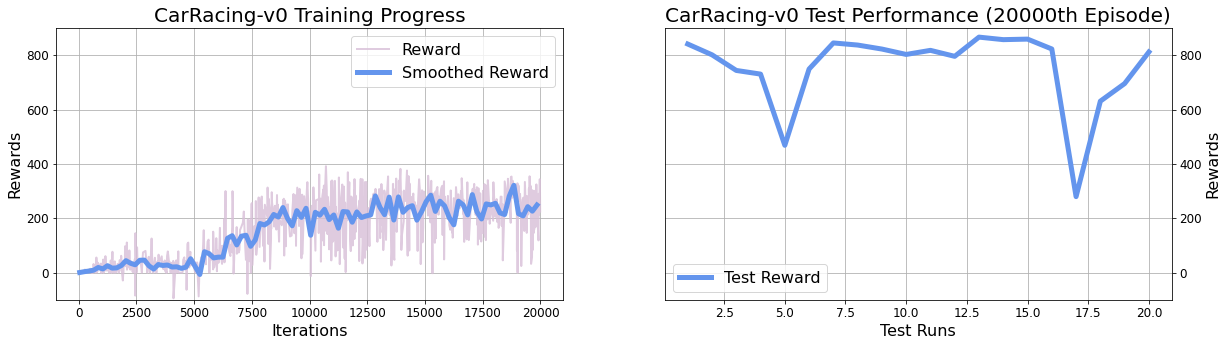

In [67]:
fig = plt.figure(figsize=(20, 5))

plt.subplot(1, 2, 1)
plt.plot(reward_train[:838, 1], reward_train[:838, 2], color='thistle', alpha=0.8, linewidth=2, label='Reward')
plt.plot(step_average, average, linewidth=5, color='cornflowerblue', label='Smoothed Reward')
plt.xlabel('Iterations', fontsize=16)
plt.ylabel('Rewards', fontsize=16)
plt.ylim([-100, 900])
plt.title('CarRacing-v0 Training Progress', fontsize=20)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid()
plt.legend(fontsize=16)

ax = plt.subplot(1, 2, 2)
plt.plot(reward_test[:, 1].astype(int), reward_test[:, 2], linewidth=5, color='cornflowerblue', label='Test Reward')
plt.ylim([-100, 900])
plt.xlabel('Test Runs', fontsize=16)
plt.ylabel('Rewards', fontsize=16)
ax.yaxis.set_label_position("right")
ax.yaxis.tick_right()
plt.title('CarRacing-v0 Test Performance (20000th Episode)', fontsize=20)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid()
plt.legend(fontsize=16)

plt.show()
fig.savefig('img/carrace_train.png', dpi=100, bbox_inches='tight')

### REINFORCE

In [68]:
reward_train = np.genfromtxt('logs/csv/run-20201015-171524_train-tag-reward.csv', delimiter=',')
reward_test = np.genfromtxt('logs/csv/run-20201020-102832_test-tag-reward.csv', delimiter=',')

In [69]:
reward_test = reward_test[1:, :]

In [70]:
# Get Smoothed Training Reward
average = []
step_average = []

interval = 200
limit = 100
step = limit/2

# The 837th row corresponds to the 20000th episode
reward_headless = reward_train[1:, :]
average_tmp = 0
counter = 0

for i in range(reward_headless.shape[0]):
    if reward_headless[i, 1] < limit:
        average_tmp += reward_headless[i, 2]
        counter += 1
    else:
        average.append(average_tmp/counter)
        limit += interval
        counter = 0
        average_tmp = 0
        step_average.append(step)
        step += interval

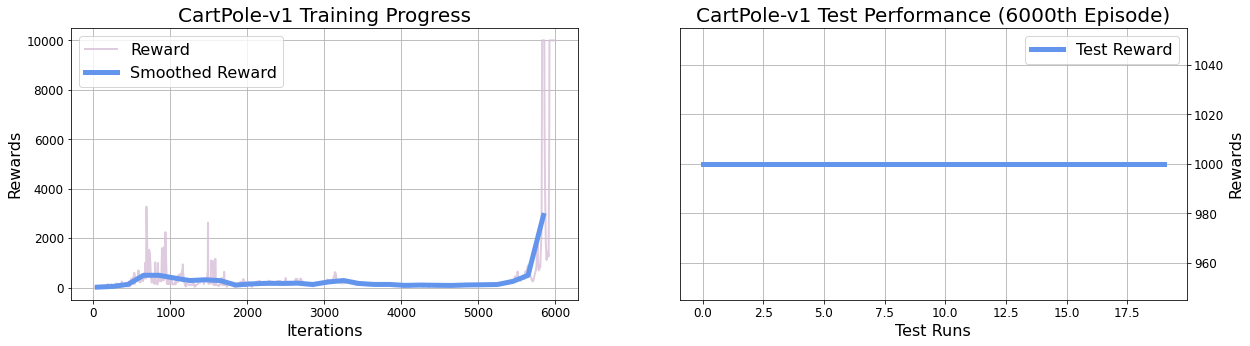

In [72]:
fig = plt.figure(figsize=(20, 5))

plt.subplot(1, 2, 1)
plt.plot(reward_train[:, 1], reward_train[:, 2], color='thistle', alpha=0.8, linewidth=2, label='Reward')
plt.plot(step_average, average, linewidth=5, color='cornflowerblue', label='Smoothed Reward')
plt.xlabel('Iterations', fontsize=16)
plt.ylabel('Rewards', fontsize=16)
# plt.ylim([-100, 900])
plt.title('CartPole-v1 Training Progress', fontsize=20)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid()
plt.legend(fontsize=16)

ax = plt.subplot(1, 2, 2)
plt.plot(reward_test[:, 1].astype(int), reward_test[:, 2], linewidth=5, color='cornflowerblue', label='Test Reward')
# plt.ylim([-100, 900])
plt.xlabel('Test Runs', fontsize=16)
plt.ylabel('Rewards', fontsize=16)
ax.yaxis.set_label_position("right")
ax.yaxis.tick_right()
plt.title('CartPole-v1 Test Performance (6000th Episode)', fontsize=20)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid()
plt.legend(fontsize=16)

plt.show()
fig.savefig('img/cartpole.png', dpi=100, bbox_inches='tight')